# Variablenclustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from varclushi import VarClusHi
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
def reset_base():
    base= pd.read_csv('additional_data/base.csv') 
    base.set_index(['Country Name', 'Indicator Name'], inplace=True)
    base = base.sort_index(level=['Country Name', 'Indicator Name'])
    return base

def iterative_imputation(df):
    col = df.columns
    idx = df.index
    iter_imp = IterativeImputer(random_state=999)
    df= iter_imp.fit_transform(df)
    df= pd.DataFrame(df, columns=col, index=idx)
    return df


In [3]:
base = reset_base()
df = iterative_imputation(base)

C:\Users\mbfbr\Anaconda3\envs\other\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [85]:
year = 2014

base= base.reset_index()
base = base[['Country Name', 'Indicator Name', str(year)]]
base = base.set_index(['Country Name', 'Indicator Name']).unstack()
base.columns = base.columns.droplevel(0)
base1 = base.reindex(columns=var)

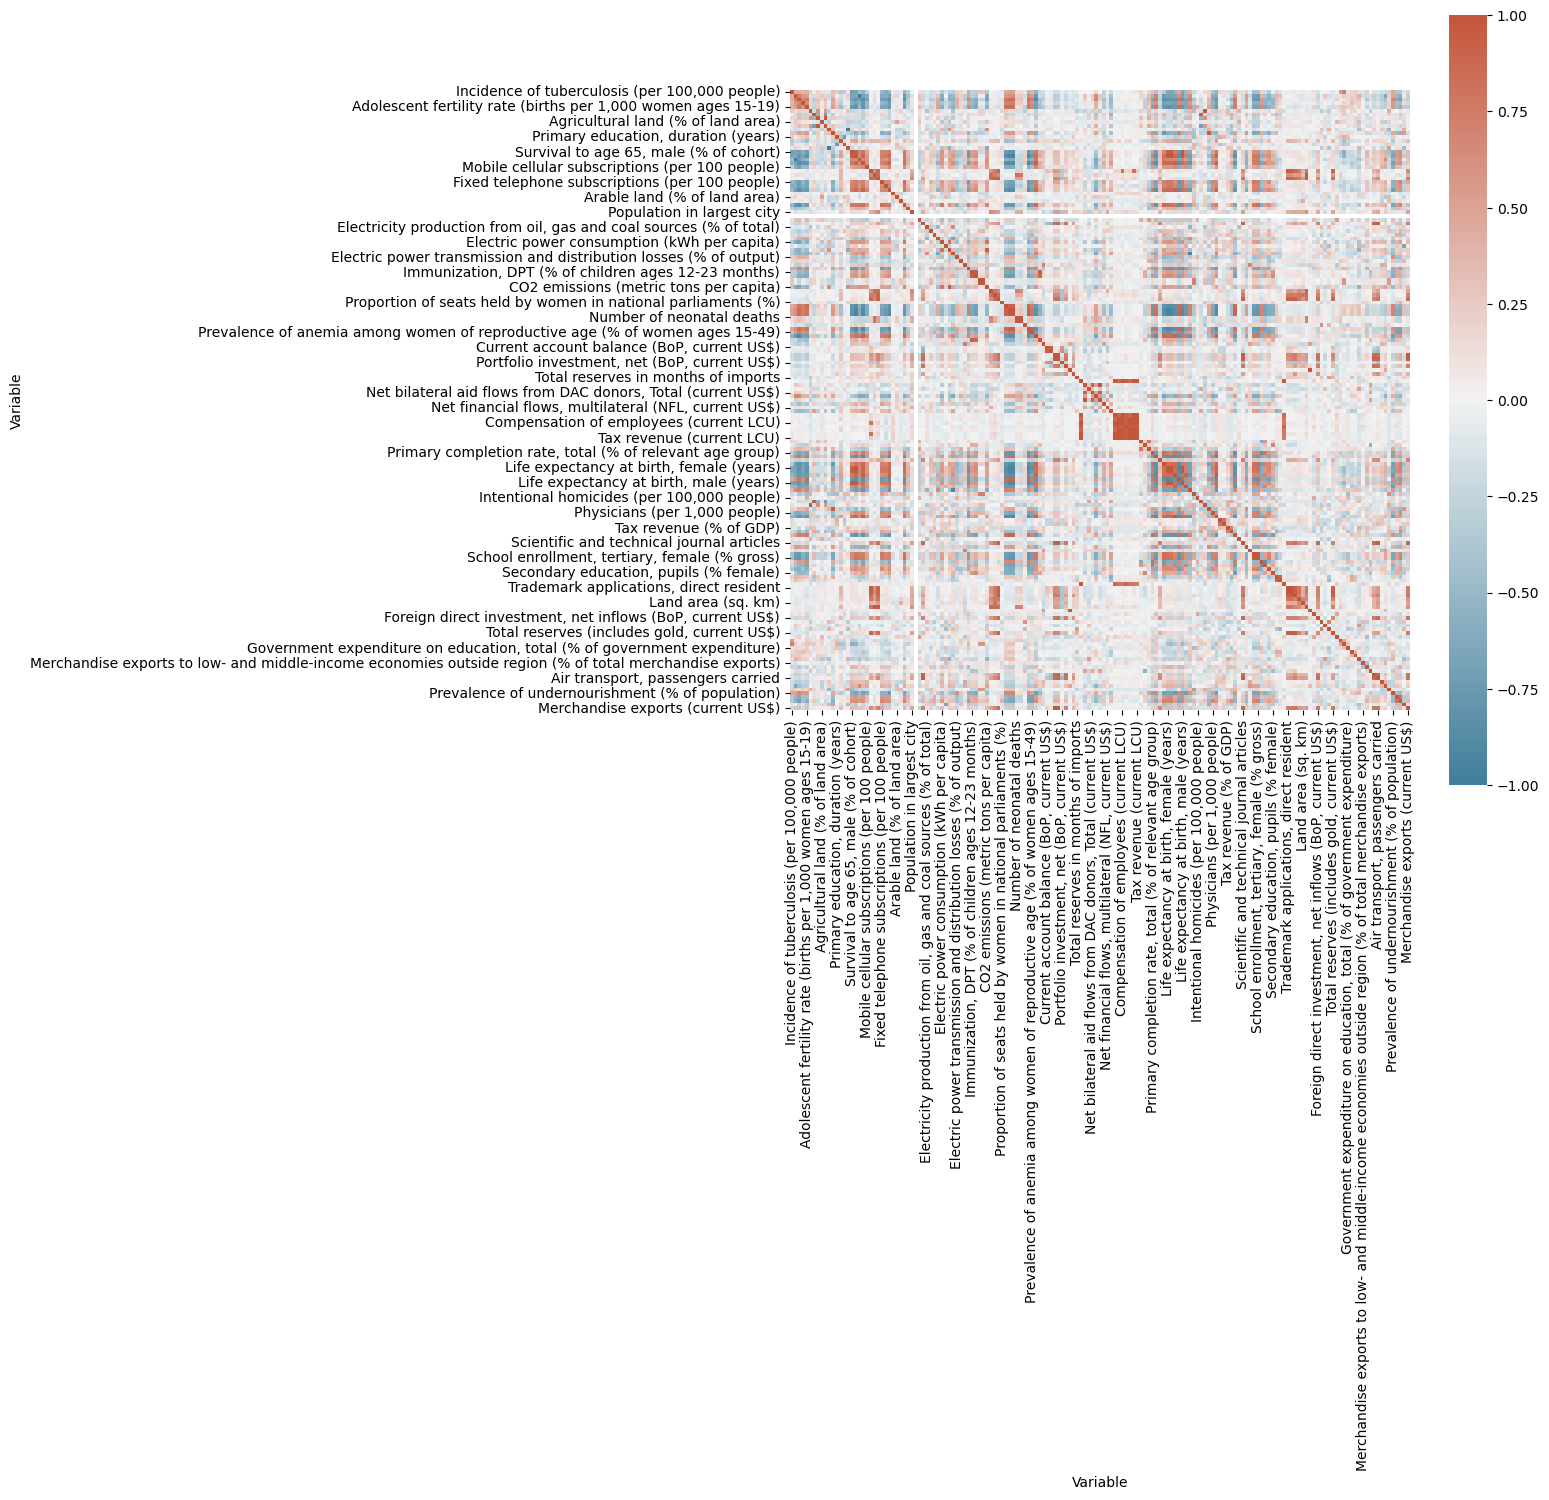

In [86]:

fig, ax = plt.subplots(figsize=(10, 10)) 
ax = sns.heatmap(base1.corr(), square=True, linewidths=0, annot=False,
                 vmin=-1, vmax=1, center=0,
                 cmap = sns.diverging_palette(230, 20, as_cmap=True))

In [4]:
year = 2014
df = df.reset_index()
df = df[['Country Name', 'Indicator Name', str(year)]]
df = df.set_index(['Country Name', 'Indicator Name']).unstack()
df.columns = df.columns.droplevel(0)

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col = df.columns
idx = df.index
df1 = pd.DataFrame(scaler.fit_transform(df), columns=col, index=idx)
df1 = df1.reindex(columns=var)

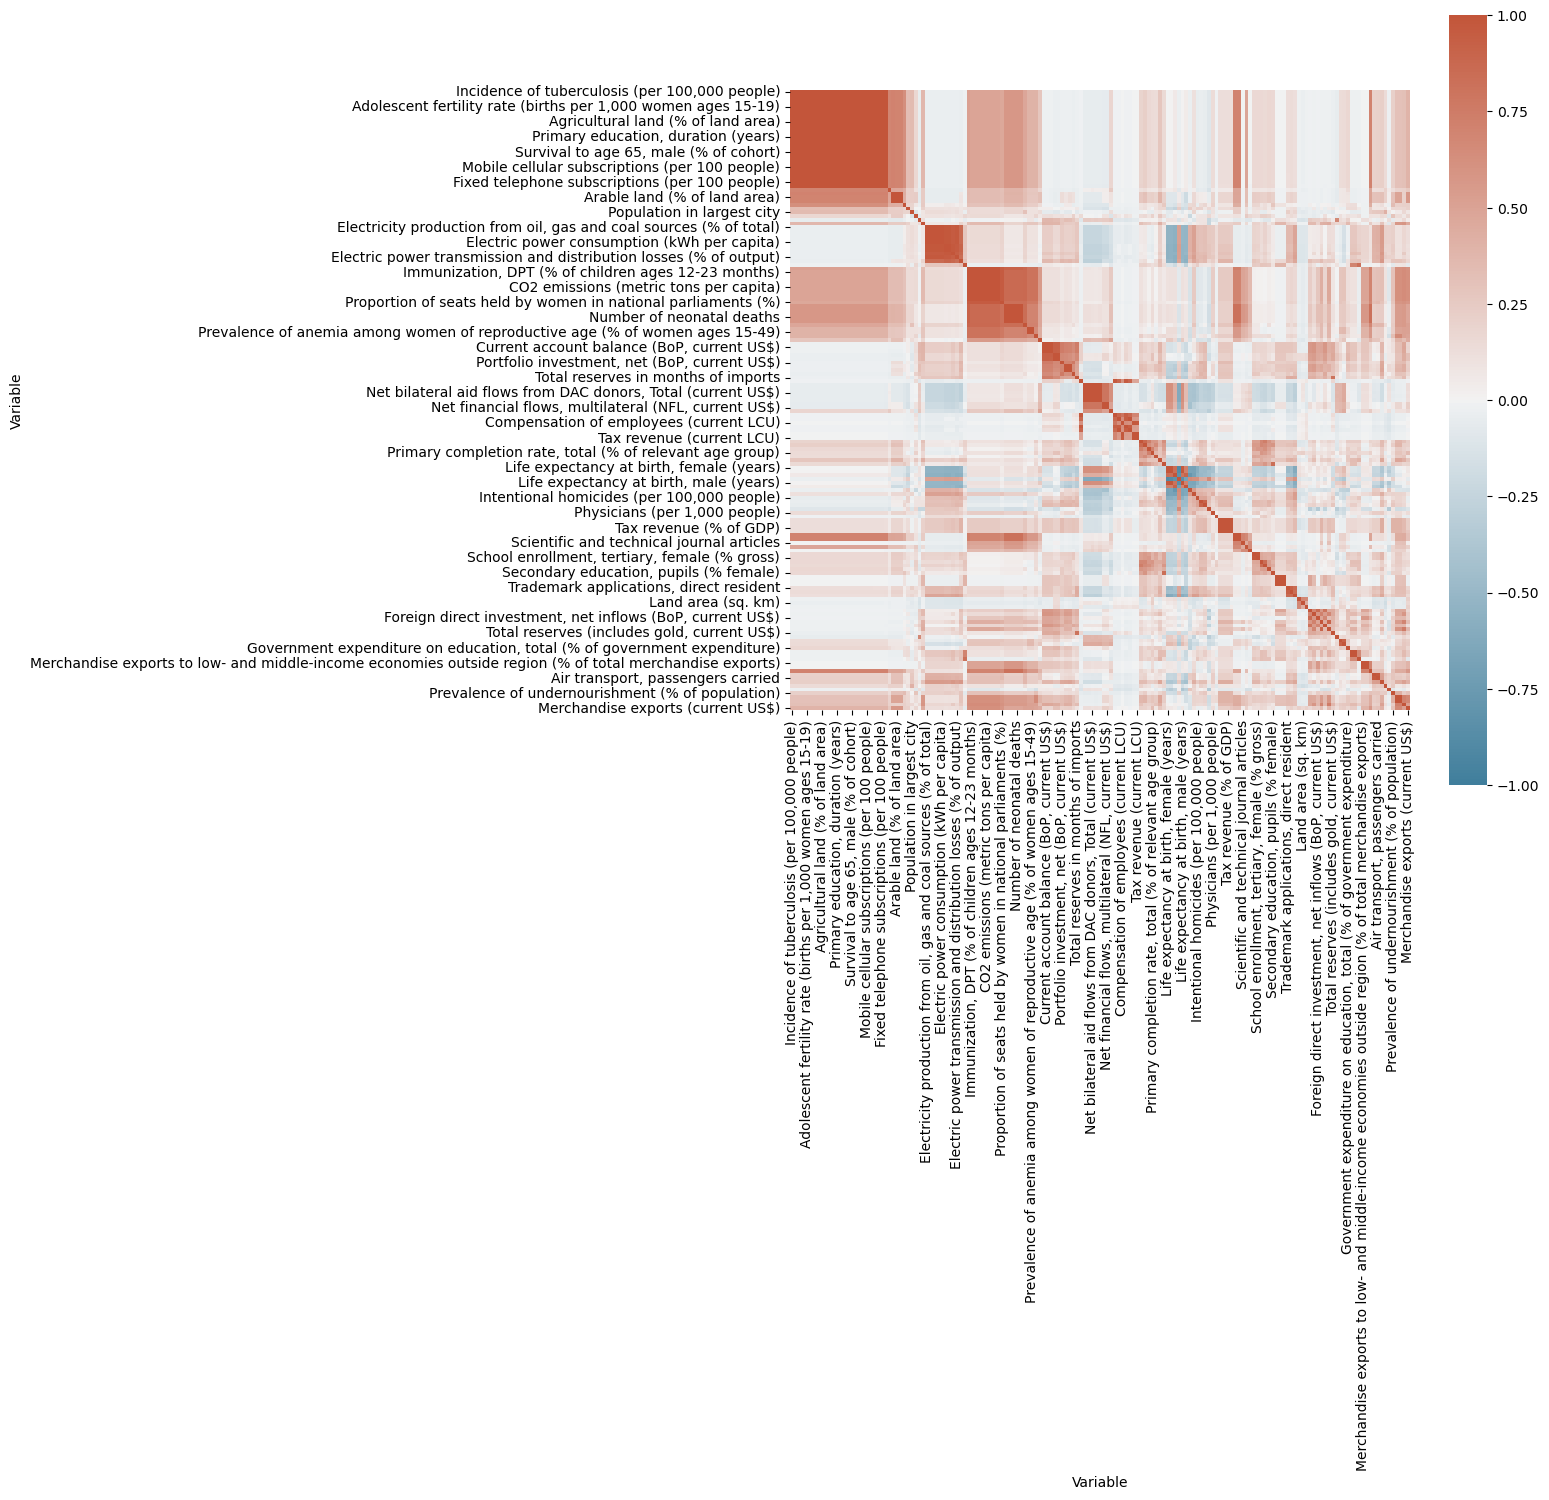

In [75]:

fig, ax = plt.subplots(figsize=(10, 10)) 
ax = sns.heatmap(df1.corr(), square=True, linewidths=0, annot=False,
                 vmin=-1, vmax=1, center=0,
                 cmap = sns.diverging_palette(230, 20, as_cmap=True))

In [49]:
var_clus = VarClusHi(df,  maxclus=20)
var_clus.varclus()

In [52]:
df_clus = var_clus.rsquare

df_clus.sort_values(['Cluster', 'RS_Ratio'], inplace=True)
#df_clus =df_clus.set_index(['Cluster', 'Variable'])


In [66]:
var = df_clus['Variable']

In [59]:
var

array(['Incidence of tuberculosis (per 100,000 people)',
       'Rural population (% of total population)',
       'Vulnerable employment, total (% of total employment) (modeled ILO estimate)',
       'People practicing open defecation (% of population)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Ratio of female to male labor force participation rate (%) (modeled ILO estimate)',
       'Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)',
       'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)',
       'Agricultural land (% of land area)',
       'Employment to population ratio, 15+, total (%) (modeled ILO estimate)',
       'Population, male (% of total population)',
       'Urban population growth (annual %)',
       'Primary education, duration (years)',
       'Sex ratio at birth (male births per female births)',
       'Secondary education, duration (years)',
     

In [20]:
df_clus = df_clus.set_index(['Cluster', 'Variable'])
print(df_clus.to_latex(longtable=True, float_format="%.3f"))

\begin{longtable}{llrrr}
\toprule
   &                                   &  RS\_Own &  RS\_NC &  RS\_Ratio \\
Cluster & Variable &         &        &           \\
\midrule
\endfirsthead

\toprule
   &                                   &  RS\_Own &  RS\_NC &  RS\_Ratio \\
Cluster & Variable &         &        &           \\
\midrule
\endhead
\midrule
\multicolumn{5}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
0  & Incidence of tuberculosis (per 100,000 people) &   0.996 &  0.283 &     0.006 \\
   & Rural population (\% of total population) &   0.996 &  0.283 &     0.006 \\
   & Vulnerable employment, total (\% of total employment) (modeled ILO estimate) &   0.996 &  0.283 &     0.006 \\
   & People practicing open defecation (\% of population) &   0.996 &  0.283 &     0.006 \\
   & Adolescent fertility rate (births per 1,000 women ages 15-19) &   0.996 &  0.283 &     0.006 \\
   & Ratio of female to male labor force participation rate (\%) (modeled ILO es

C:\Users\mbfbr\AppData\Local\Temp\ipykernel_4404\2750406669.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_clus.to_latex(longtable=True, float_format="%.3f"))
